In [1]:
import sys
from pennylane import numpy as np
import pennylane as qml

from qiskit.visualization import array_to_latex

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from ipywidgets import widgets
from IPython.display import display, HTML


In [ ]:
def deutsch_jozsa(fs):
    """Function that determines whether four given functions are all of the same type or not.

    Args:
        - fs (list(function)): A list of 4 quantum functions. Each of them will accept a 'wires' parameter.
        The first two wires refer to the input and the third to the output of the function.

    Returns:
        - (str) : "4 same" or "2 and 2"
    """

    # QHACK #

    # QHACK #


[0. 0. 0. 0.]
0.0


(<Figure size 504x936 with 1 Axes>, <Axes:>)

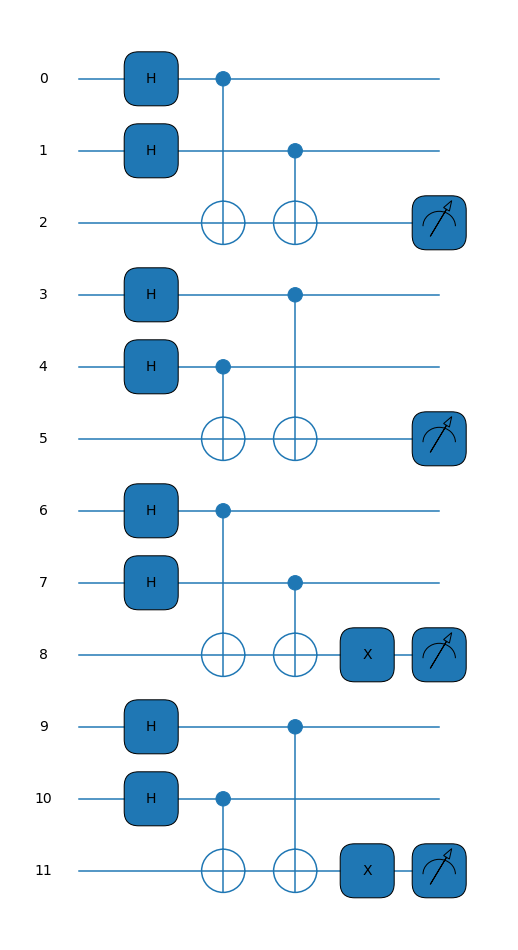

In [2]:
# DO NOT MODIFY anything in this code block
# inputs = sys.stdin.read().split(",")
# numbers = [int(i) for i in inputs]

# numbers = [0,0,1,1,0,0,1,1]
numbers = [0,1,1,0,0,1,1,0]

# Definition of the four oracles we will work with.

def f1(wires):
    qml.CNOT(wires=[wires[numbers[0]], wires[2]])
    qml.CNOT(wires=[wires[numbers[1]], wires[2]])

def f2(wires):
    qml.CNOT(wires=[wires[numbers[2]], wires[2]])
    qml.CNOT(wires=[wires[numbers[3]], wires[2]])

def f3(wires):
    qml.CNOT(wires=[wires[numbers[4]], wires[2]])
    qml.CNOT(wires=[wires[numbers[5]], wires[2]])
    qml.PauliX(wires=wires[2])

def f4(wires):
    qml.CNOT(wires=[wires[numbers[6]], wires[2]])
    qml.CNOT(wires=[wires[numbers[7]], wires[2]])
    qml.PauliX(wires=wires[2])

# output = deutsch_jozsa([f1, f2, f3, f4])
# print(f"{output}")

dev = qml.device("default.qubit", wires=12, shots=None)

@qml.qnode(dev)
def circuit():

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    f1([0, 1, 2])

    qml.Hadamard(wires=3)
    qml.Hadamard(wires=4)
    f2([3, 4, 5])

    qml.Hadamard(wires=6)
    qml.Hadamard(wires=7)
    f3([6, 7, 8])

    qml.Hadamard(wires=9)
    qml.Hadamard(wires=10)
    f4([9, 10, 11])

    # return qml.probs(wires=[2])
    return qml.expval(qml.PauliZ(wires=2)), qml.expval(qml.PauliZ(wires=5)), qml.expval(qml.PauliZ(wires=8)), qml.expval(qml.PauliZ(wires=11))
    # qml.prob(qml.PauliZ(2))


res = circuit()

# array_to_latex(res)
print(res)
print(np.sum(np.absolute(res)))
qml.draw_mpl(circuit)()


[0. 0. 0. 0.]
0.0
0.0
n_balanced:  4


(<Figure size 1008x504 with 1 Axes>, <Axes:>)

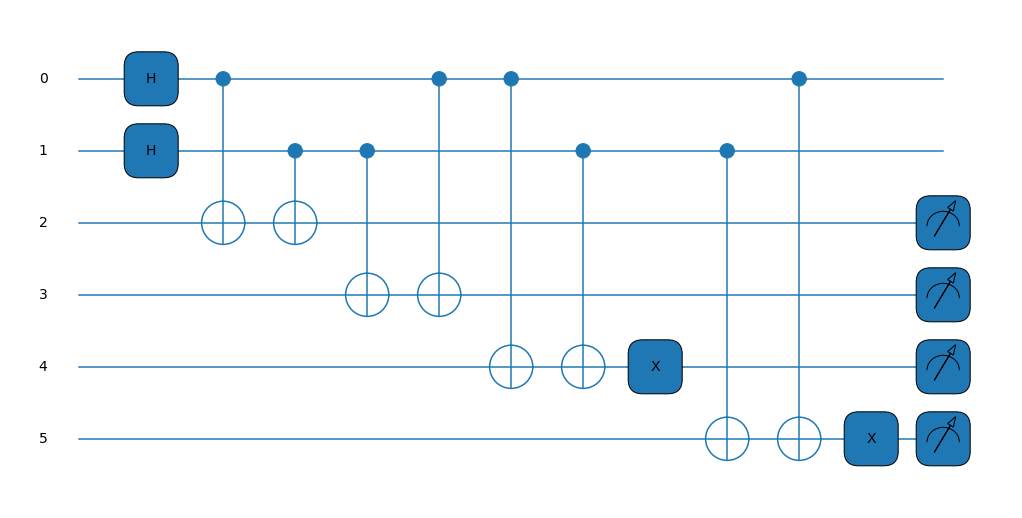

In [66]:
# DO NOT MODIFY anything in this code block
# inputs = sys.stdin.read().split(",")
# numbers = [int(i) for i in inputs]

# constants
# numbers = [0,0,1,1,0,0,1,1]



# balanced
numbers = [0,1,1,0,0,1,1,0]

# Definition of the four oracles we will work with.

def f1(wires):
    qml.CNOT(wires=[wires[numbers[0]], wires[2]])
    qml.CNOT(wires=[wires[numbers[1]], wires[2]])

def f2(wires):
    qml.CNOT(wires=[wires[numbers[2]], wires[2]])
    qml.CNOT(wires=[wires[numbers[3]], wires[2]])

def f3(wires):
    qml.CNOT(wires=[wires[numbers[4]], wires[2]])
    qml.CNOT(wires=[wires[numbers[5]], wires[2]])
    qml.PauliX(wires=wires[2])

def f4(wires):
    qml.CNOT(wires=[wires[numbers[6]], wires[2]])
    qml.CNOT(wires=[wires[numbers[7]], wires[2]])
    qml.PauliX(wires=wires[2])

# output = deutsch_jozsa([f1, f2, f3, f4])
# print(f"{output}")

# dev = qml.device("default.qubit", wires=8, shots=1)
dev = qml.device("default.qubit", wires=8)

# f4 = f1

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    f1([0, 1, 2])

    # qml.Hadamard(wires=3)
    # qml.Hadamard(wires=4)
    f2([0, 1, 3])

    # qml.Hadamard(wires=6)
    # qml.Hadamard(wires=7)
    f3([0, 1, 4])

    # qml.Hadamard(wires=9)
    # qml.Hadamard(wires=10)
    f4([0, 1, 5])

    # return qml.probs(wires=[2])
    return qml.expval(qml.PauliZ(wires=2)), qml.expval(qml.PauliZ(wires=3)), qml.expval(qml.PauliZ(wires=4)), qml.expval(qml.PauliZ(wires=5))
    # qml.prob(qml.PauliZ(2))


res = circuit()

# array_to_latex(res)
print(res)
print(np.sum(res))
print(np.sum(np.absolute(res)))


output = '4 same'
n_balanced = 0
for i in res:
    if i==0:
        n_balanced += 1
if n_balanced==2:
    output = '2 and 2'

print('n_balanced: ', n_balanced)

qml.draw_mpl(circuit)()
